# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=1200, n_features=8,
                 random_state=1, cluster_std = 8, centers = 7 )


In [2]:
X= data[0]
y = data[1]

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

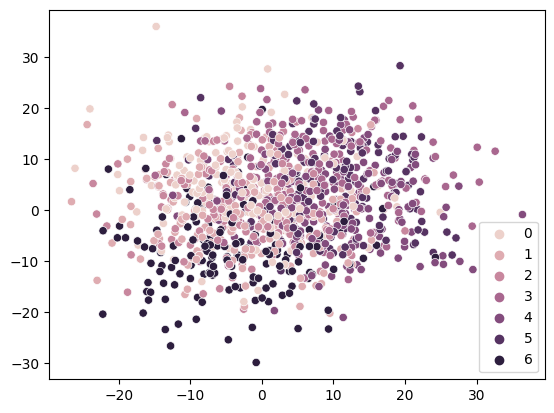

In [3]:
# YOUR CODE HERE
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
df = pd.DataFrame(X)
sns.scatterplot(X.T[0], X.T[1], hue= y)

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

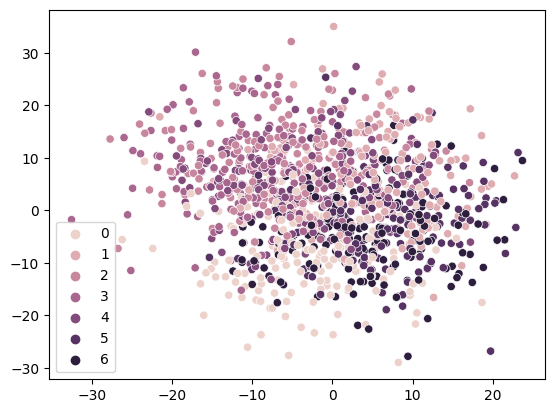

In [4]:
# YOUR CODE HERE
sns.scatterplot(X.T[3], X.T[5], hue= y)

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [5]:
y


array([2, 2, 5, ..., 1, 3, 0])

In [6]:
# YOUR CODE HERE
from keras.utils import to_categorical
y_cat = to_categorical(y, num_classes = 7, dtype= 'float32')


2022-11-14 16:36:03.855197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [15]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, random_state=3)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [9]:
from tensorflow.keras import Sequential, layers

In [10]:

def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 

    model = Sequential() 
    model.add(layers.Dense(50, activation = 'relu', input_dim = 8))
    model.add(layers.Dense(7, activation = 'sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

2022-11-14 16:36:09.595939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [11]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [12]:
X_train.shape

(840, 8)

In [17]:
# YOUR CODE HERE
model.fit(X_train, y_train, epochs =50)

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 4.0323 - accuracy: 0.2595
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 2.3385 - accuracy: 0.3857
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 1.5737 - accuracy: 0.5083
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 1.2252 - accuracy: 0.5762
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 1.0631 - accuracy: 0.6274
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9869 - accuracy: 0.6560
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9392 - accuracy: 0.6714
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.6940
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.8823 - accuracy: 0.6917
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8626 - accuracy: 0.6976
Epoch 11/50
27/27 [

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [ ]:

# YOUR CODE HERE
model.evaluate(X, y)

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [ ]:
accuracy_baseline = 1 / 7
accuracy_baseline

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [19]:
# YOUR CODE HERE
model.fit(X_train, y_train, epochs =1000)

Epoch 1/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7524
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.7512
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.7607
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7583
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.7619
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7583
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.7619
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.7595
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7690
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7524

27/27 [==============================] - 0s 983us/step - loss: 0.5291 - accuracy: 0.8012
Epoch 82/1000
27/27 [==============================] - 0s 977us/step - loss: 0.5223 - accuracy: 0.8024
Epoch 83/1000
27/27 [==============================] - 0s 881us/step - loss: 0.5205 - accuracy: 0.8083
Epoch 84/1000
27/27 [==============================] - 0s 872us/step - loss: 0.5249 - accuracy: 0.8012
Epoch 85/1000
27/27 [==============================] - 0s 954us/step - loss: 0.5215 - accuracy: 0.8012
Epoch 86/1000
27/27 [==============================] - 0s 874us/step - loss: 0.5198 - accuracy: 0.7964
Epoch 87/1000
27/27 [==============================] - 0s 907us/step - loss: 0.5156 - accuracy: 0.8048
Epoch 88/1000
27/27 [==============================] - 0s 940us/step - loss: 0.5151 - accuracy: 0.8024
Epoch 89/1000
27/27 [==============================] - 0s 868us/step - loss: 0.5189 - accuracy: 0.8000
Epoch 90/1000
27/27 [==============================] - 0s 926us/step - loss: 0.5209 - a

27/27 [==============================] - 0s 961us/step - loss: 0.4489 - accuracy: 0.8286
Epoch 161/1000
27/27 [==============================] - 0s 976us/step - loss: 0.4487 - accuracy: 0.8345
Epoch 162/1000
27/27 [==============================] - 0s 878us/step - loss: 0.4500 - accuracy: 0.8321
Epoch 163/1000
27/27 [==============================] - 0s 876us/step - loss: 0.4433 - accuracy: 0.8429
Epoch 164/1000
27/27 [==============================] - 0s 916us/step - loss: 0.4496 - accuracy: 0.8369
Epoch 165/1000
27/27 [==============================] - 0s 887us/step - loss: 0.4554 - accuracy: 0.8274
Epoch 166/1000
27/27 [==============================] - 0s 876us/step - loss: 0.4484 - accuracy: 0.8345
Epoch 167/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8310
Epoch 168/1000
27/27 [==============================] - 0s 906us/step - loss: 0.4443 - accuracy: 0.8357
Epoch 169/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.451

27/27 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8548
Epoch 240/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8571
Epoch 241/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8655
Epoch 242/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8679
Epoch 243/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8643
Epoch 244/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8607
Epoch 245/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8560
Epoch 246/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8631
Epoch 247/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8690
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.

27/27 [==============================] - 0s 900us/step - loss: 0.3558 - accuracy: 0.8714
Epoch 319/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8750
Epoch 320/1000
27/27 [==============================] - 0s 931us/step - loss: 0.3496 - accuracy: 0.8833
Epoch 321/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8774
Epoch 322/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8702
Epoch 323/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8833
Epoch 324/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8690
Epoch 325/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8881
Epoch 326/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8845
Epoch 327/1000
27/27 [==============================] - 0s 970us/step - loss: 0.3459 - accura

27/27 [==============================] - 0s 934us/step - loss: 0.3095 - accuracy: 0.8905
Epoch 398/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8952
Epoch 399/1000
27/27 [==============================] - 0s 926us/step - loss: 0.3053 - accuracy: 0.8905
Epoch 400/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8964
Epoch 401/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8940
Epoch 402/1000
27/27 [==============================] - 0s 983us/step - loss: 0.3136 - accuracy: 0.8940
Epoch 403/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.9000
Epoch 404/1000
27/27 [==============================] - 0s 937us/step - loss: 0.3076 - accuracy: 0.8952
Epoch 405/1000
27/27 [==============================] - 0s 957us/step - loss: 0.3119 - accuracy: 0.8905
Epoch 406/1000
27/27 [==============================] - 0s 934us/step - loss: 0.3119 - 

27/27 [==============================] - 0s 902us/step - loss: 0.2759 - accuracy: 0.9083
Epoch 477/1000
27/27 [==============================] - 0s 944us/step - loss: 0.2692 - accuracy: 0.9167
Epoch 478/1000
27/27 [==============================] - 0s 944us/step - loss: 0.2690 - accuracy: 0.9143
Epoch 479/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9131
Epoch 480/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9083
Epoch 481/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9226
Epoch 482/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9119
Epoch 483/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.9190
Epoch 484/1000
27/27 [==============================] - 0s 989us/step - loss: 0.2741 - accuracy: 0.9048
Epoch 485/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2744 - accu

27/27 [==============================] - 0s 915us/step - loss: 0.2384 - accuracy: 0.9262
Epoch 556/1000
27/27 [==============================] - 0s 972us/step - loss: 0.2417 - accuracy: 0.9250
Epoch 557/1000
27/27 [==============================] - 0s 918us/step - loss: 0.2459 - accuracy: 0.9190
Epoch 558/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9226
Epoch 559/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9262
Epoch 560/1000
27/27 [==============================] - 0s 990us/step - loss: 0.2407 - accuracy: 0.9238
Epoch 561/1000
27/27 [==============================] - 0s 916us/step - loss: 0.2374 - accuracy: 0.9286
Epoch 562/1000
27/27 [==============================] - 0s 905us/step - loss: 0.2400 - accuracy: 0.9286
Epoch 563/1000
27/27 [==============================] - 0s 956us/step - loss: 0.2471 - accuracy: 0.9214
Epoch 564/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2394 

27/27 [==============================] - 0s 1ms/step - loss: 0.2103 - accuracy: 0.9440
Epoch 635/1000
27/27 [==============================] - 0s 963us/step - loss: 0.2072 - accuracy: 0.9393
Epoch 636/1000
27/27 [==============================] - 0s 886us/step - loss: 0.2090 - accuracy: 0.9429
Epoch 637/1000
27/27 [==============================] - 0s 956us/step - loss: 0.2078 - accuracy: 0.9393
Epoch 638/1000
27/27 [==============================] - 0s 906us/step - loss: 0.2124 - accuracy: 0.9369
Epoch 639/1000
27/27 [==============================] - 0s 907us/step - loss: 0.2068 - accuracy: 0.9429
Epoch 640/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9405
Epoch 641/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9429
Epoch 642/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9321
Epoch 643/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2036 - ac

27/27 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9464
Epoch 714/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9512
Epoch 715/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9536
Epoch 716/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9464
Epoch 717/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.9488
Epoch 718/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9524
Epoch 719/1000
27/27 [==============================] - 0s 948us/step - loss: 0.1848 - accuracy: 0.9476
Epoch 720/1000
27/27 [==============================] - 0s 933us/step - loss: 0.1822 - accuracy: 0.9548
Epoch 721/1000
27/27 [==============================] - 0s 914us/step - loss: 0.1848 - accuracy: 0.9500
Epoch 722/1000
27/27 [==============================] - 0s 902us/step - loss: 0.1859 - accu

27/27 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9548
Epoch 793/1000
27/27 [==============================] - 0s 987us/step - loss: 0.1614 - accuracy: 0.9631
Epoch 794/1000
27/27 [==============================] - 0s 891us/step - loss: 0.1611 - accuracy: 0.9655
Epoch 795/1000
27/27 [==============================] - 0s 975us/step - loss: 0.1624 - accuracy: 0.9643
Epoch 796/1000
27/27 [==============================] - 0s 934us/step - loss: 0.1604 - accuracy: 0.9607
Epoch 797/1000
27/27 [==============================] - 0s 899us/step - loss: 0.1608 - accuracy: 0.9583
Epoch 798/1000
27/27 [==============================] - 0s 969us/step - loss: 0.1596 - accuracy: 0.9595
Epoch 799/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9595
Epoch 800/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9595
Epoch 801/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1589 - 

27/27 [==============================] - 0s 922us/step - loss: 0.1476 - accuracy: 0.9595
Epoch 872/1000
27/27 [==============================] - 0s 928us/step - loss: 0.1430 - accuracy: 0.9690
Epoch 873/1000
27/27 [==============================] - 0s 947us/step - loss: 0.1413 - accuracy: 0.9690
Epoch 874/1000
27/27 [==============================] - 0s 898us/step - loss: 0.1437 - accuracy: 0.9643
Epoch 875/1000
27/27 [==============================] - 0s 909us/step - loss: 0.1444 - accuracy: 0.9619
Epoch 876/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9679
Epoch 877/1000
27/27 [==============================] - 0s 918us/step - loss: 0.1397 - accuracy: 0.9655
Epoch 878/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9690
Epoch 879/1000
27/27 [==============================] - 0s 960us/step - loss: 0.1429 - accuracy: 0.9643
Epoch 880/1000
27/27 [==============================] - 0s 915us/step - loss: 0.145

27/27 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9690
Epoch 951/1000
27/27 [==============================] - 0s 940us/step - loss: 0.1272 - accuracy: 0.9679
Epoch 952/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9679
Epoch 953/1000
27/27 [==============================] - 0s 955us/step - loss: 0.1223 - accuracy: 0.9738
Epoch 954/1000
27/27 [==============================] - 0s 881us/step - loss: 0.1284 - accuracy: 0.9726
Epoch 955/1000
27/27 [==============================] - 0s 868us/step - loss: 0.1295 - accuracy: 0.9714
Epoch 956/1000
27/27 [==============================] - 0s 917us/step - loss: 0.1241 - accuracy: 0.9798
Epoch 957/1000
27/27 [==============================] - 0s 869us/step - loss: 0.1239 - accuracy: 0.9726
Epoch 958/1000
27/27 [==============================] - 0s 933us/step - loss: 0.1239 - accuracy: 0.9714
Epoch 959/1000
27/27 [==============================] - 0s 891us/step - loss: 0.125

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [20]:
# YOUR CODE HERE
model.evaluate(X,y)

ValueError: in user code:

    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/mariazoghzoghi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [ ]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [27]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

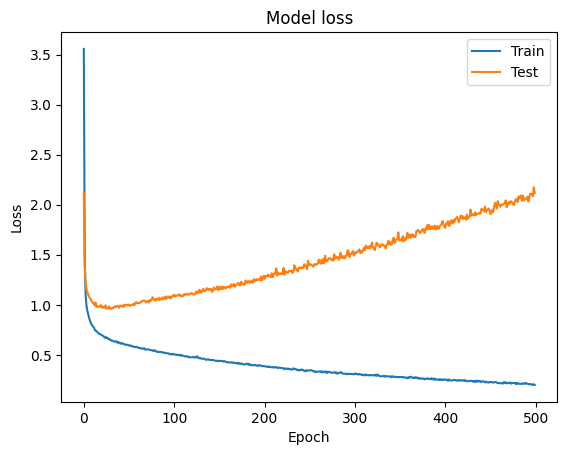

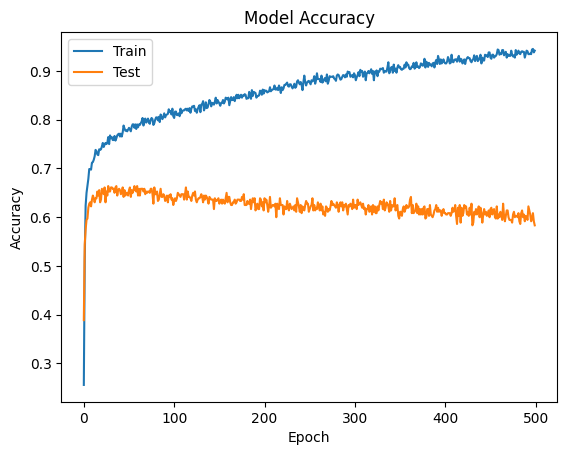

In [28]:
# YOUR CODE HERE
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!